<a href="https://colab.research.google.com/github/codewitharchana/analysis/blob/main/Jobathon_RFC_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.metrics 
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances        # To retrieve Feature Importances over model
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline

# For Random seed values
from random import randint

# For Scientifc Python
from scipy import stats

# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from numpy import loadtxt
from xgboost import XGBClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 80 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90



### **Data Loading**

- In this section we will get **load the data from csv files**.

In [ ]:
#Reading TRAIN DATA
train_data = pd.read_csv('train_jobathon.csv')
print('Data Shape:', train_data.shape)
train_data.head()

Data Shape: (39161, 19)


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
#Reading TEST DATA
test_data = pd.read_csv('test_jobathon.csv')
print('Data Shape:', test_data.shape)
test_data.head()

Data Shape: (13184, 18)


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


### **Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
train_data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [ ]:
test_data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,13184.000000,13184.000000,13184.000000,5048.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
mean,45753.500000,7.724439,7.943416,2.108954,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228
std,3806.037309,3.599981,2.687832,0.783483,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45753.500000,8.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49049.250000,10.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [ ]:
train_data.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [ ]:
print('mean',train_data['products_purchased'].mean())
print('mode',train_data['products_purchased'].mode())


mean 2.1541369863013697
mode 0    2.0
dtype: float64


**Observation:**

- We can observer that there values **missing in product_purchased & signup_date columns**.

- Addtionally, all **other features** seems to have ***correct data type/values***.

**EDA Action 1** : *Delete products_purchased column*

**'products_purchased'** is an important column but it has **more than 50% values missing**. There are chances a lead dropped after buying specific # of items. They may not be happy with a specific items. But with more than 50% of missing values **we can not derive much information.** *If we replace these missing values mean the results may be biased. Hence it is advisable to drop this column.*


In [ ]:
# DROPPING products_purchased from TRAIN & TEST DATA
train_data.drop(columns=['products_purchased'],inplace=True)
test_data.drop(columns=['products_purchased'],inplace=True)
print('DROPPED products_purchased from TRAIN & TEST DATA')
print(train_data.shape)
print(test_data.shape)

DROPPED products_purchased from TRAIN & TEST DATA
(10072, 15)
(13184, 17)



**EDA Action 2 (analysis)** : *Add couln to find the # od days a Lead/customer stayed before dropping off*

'**'signup_date'** column has **38% (approx.) values missing**. It seems very unlikey that a lead drop is related to sign_up date. But it will good to check if there is a relation between signup_date and created_at columns. 


*   For the rows, where we have data available in both created_at & signup_date, we will caluculate the number of days difference between these dates.
*   Here, we will try to see if there is a Trial period involved. Mostly we have seen customers are given a trial period of a 1 week/2 weeks/1 month. And customers tend to drop right before Trail period end if ther are not happy. If no such relationship found then we will delete this column as well.

In [ ]:
from datetime import datetime
df_train = train_data.copy(deep=True)

df_train["created_at"] = pd.to_datetime(df_train["created_at"],format='%Y-%m-%d') 
df_train["signup_date"] = pd.to_datetime(df_train["signup_date"],format='%Y-%m-%d') 

df_train['range'] = df_train["created_at"] - df_train["signup_date"]
df_train.head(50)

print('Total qunique values : ' ,df_train['range'].nunique())


Total qunique values :  1940


**EDA Decision Action 2 :**

We have 1940 unique values which means there is no pattern in terms of duration. So we can drop the coulmn **'signup_date'**

In [ ]:
# DROPPING products_purchased from TRAIN & TEST DATA
train_data.drop(columns=['signup_date'],inplace=True)
test_data.drop(columns=['signup_date'],inplace=True)
print('DROPPED signup_date from TRAIN & TEST DATA')
print(train_data.shape)
print(test_data.shape)

DROPPED signup_date from TRAIN & TEST DATA
(10072, 15)
(13184, 16)


**EDA Action 3 :** 

Drop 'created_at' column. The date on which a Lead dropped is less likely to be related to Lead's decision to discontinue 

In [ ]:
## DROPPING products_purchased from TRAIN & TEST DATA
train_data.drop(columns=['created_at'],inplace=True)
test_data.drop(columns=['created_at'],inplace=True)
print('DROPPED created_at from TRAIN & TEST DATA')
print(train_data.shape)
print(test_data.shape)

DROPPED created_at from TRAIN & TEST DATA
(10072, 15)
(13184, 15)


**EDA Action 4 :** 

Drop 'id' column. id is not related to Lead's decision to discontinue. This is just an identifier.

In [ ]:
# DROPPING products_purchased from TRAIN & TEST DATA
train_data.drop(columns=['id'],inplace=True)
test_data.drop(columns=['id'],inplace=True)
print('DROPPED id from TRAIN  DATA')
print(train_data.shape)
print(test_data.shape)

DROPPED id from TRAIN  DATA
(10072, 15)
(13184, 14)


**EDA Action 4 :**


Dropping Duplicates from Training Data (if any)

In [ ]:
train_data.drop_duplicates(inplace=True)
print('Dropping Duplicates Success!')
print(train_data.shape)

Dropping Duplicates Success!
(10072, 15)


**Observation** - 


*   Train dataset rows reduced from 39161 to 10072, which means approx 2/3 of the data was duplicate after dropping id.




**Numerical Data Distribution:**


 We shall plot all numerical features to analyze the distribution of their past.




In [ ]:
train_data.columns

Index(['campaign_var_1', 'campaign_var_2', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

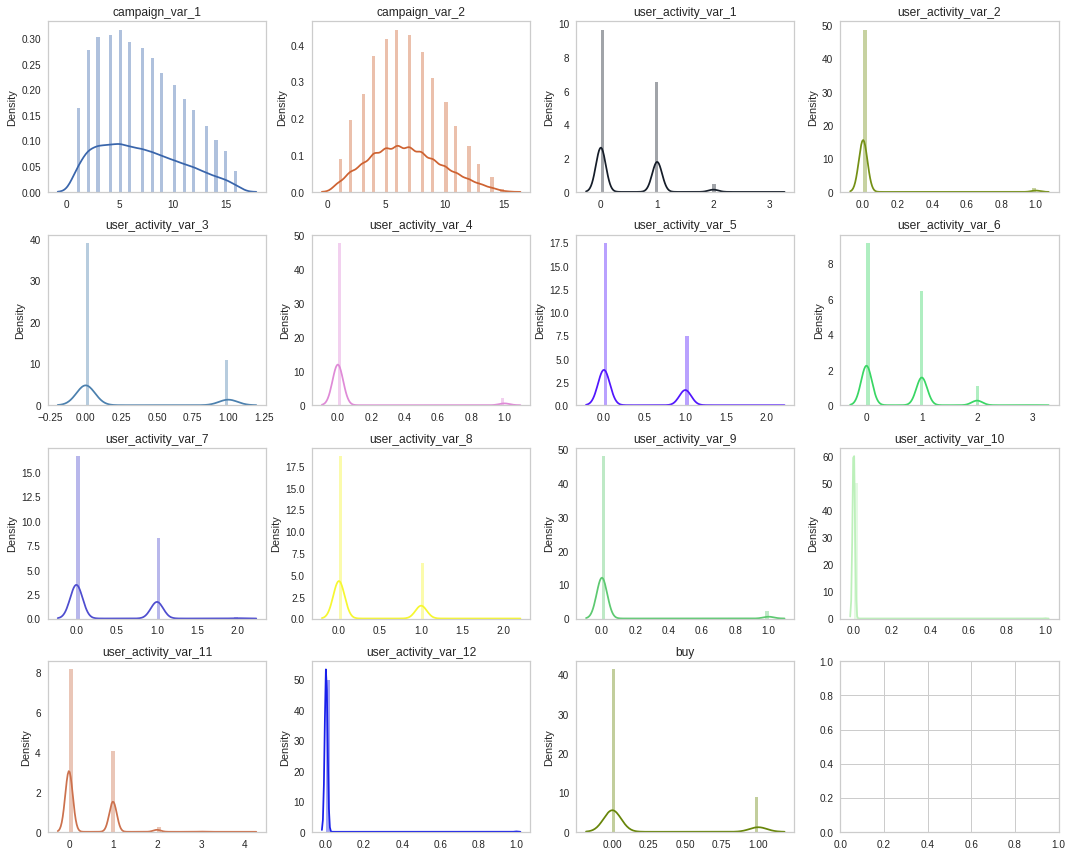

In [ ]:
# Creating subplots
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(15, 12))

# Generating random colors based on number of columns
colors = []
for i in range(len(train_data.columns)):
  colors.append('#%06X' % randint(0, 0xFFFFFF))   
                
for ax, col, color in zip(axes.flat, train_data.columns, colors):
  sns.distplot(a = train_data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, xlabel = '')
  ax.grid(False)
plt.tight_layout()
plt.show()

**Positively Skewed Data**
* buy
* user_activity_11
* user_activity_12
* user_activity_2
* user_activity_10

**Negatively Skewed Data**

* None

**Normally Distributed**

* campaign_var_1
* campaign_var_2

**Identification & Handling of Redundant Features**

For handling duplicate features we have created a custom function to identify duplicacy in features with different name but similar values:

In [ ]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [ ]:
print(duplicate_cols(train_data))

None


**Observation:**

It turns out that there aren't any duplicate columns in features.

**Feature Selection using Random Forest**

* Now in real world, it is very rare that all the features are important while developing the model.
* So instead we analyze the impact of input over the target, either done by performing statistical tests(Pearson, ANOVA, Chi-Square) or by using Random Forest.
* Random forests are one the most popular machine learning algorithms because they provide:


         1.   a good predictive performance,
         2.   low overfitting and
         3.   easy interpretability.

*  This interpretability is derived from the importance of each feature on the tree decision evaluated on the reduction in impurity.

In other words, it is easy to compute how much each feature is contributing to the decision.

Below we have implemented a function namely, SelectFromModel available in Sklearn which uses the base estimator to identify important features.
The importance of feature is determined on the basis of threshold (a measure to calculate feature importance).

In [ ]:
X = train_data.drop('buy', axis = 1)
y = train_data['buy']

print(X.shape)
print(y.shape)

(10072, 14)
(10072,)


In [ ]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 6
Threshold set by Model: 0.07
Features: ['campaign_var_1', 'campaign_var_2', 'user_activity_var_2', 'user_activity_var_4', 'user_activity_var_9', 'user_activity_var_11']


**Visualzation of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

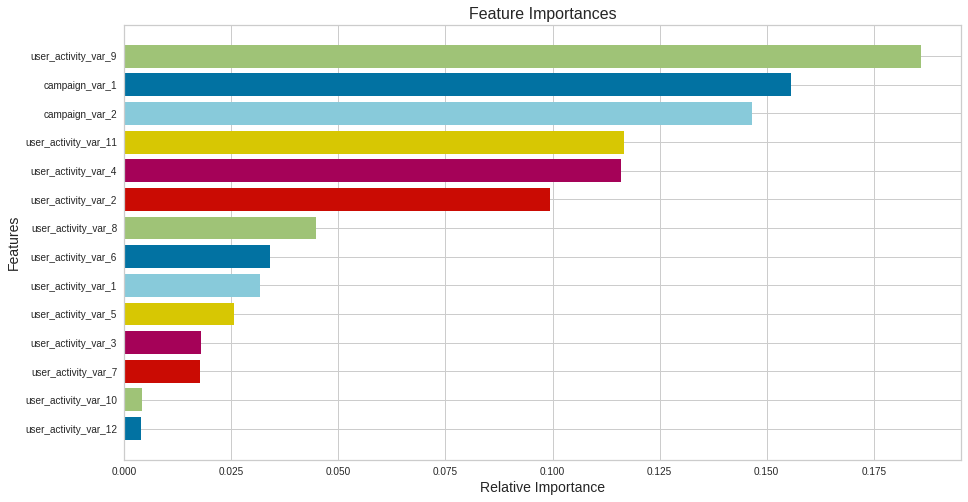

In [ ]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (8057, 14) (8057,)
Testing Data Shape: (2015, 14) (2015,)


**Model Development & Evaluation**
---

- In this section we will **develop differnt models using only importatnt feature** as marked important by Random Forest.
- Then we will **compare the results** obtained from them and make our observation.
- For **evaluation purpose** we will plot **precision and recall** for **each** **estimator** for which have **made** a **custom function below**.
- **Remember** that **we want generalize results** i.e. same results or error in testing data as that of training data.
- **At the end** we will **tune** our **models if required**.

**Logistic Regression**

In [ ]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)

y_train_pred_proba = log.predict_proba(X_train)
y_test_pred_proba = log.predict_proba(X_test)
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6648
           1       0.93      0.55      0.69      1409

    accuracy                           0.91      8057
   macro avg       0.92      0.77      0.82      8057
weighted avg       0.91      0.91      0.90      8057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1663
           1       0.93      0.59      0.72       352

    accuracy                           0.92      2015
   macro avg       0.92      0.79      0.84      2015
weighted avg       0.92      0.92      0.91      2015



**Observation:**

- **Accuracy** for **training data is low** as **compared to testing data**.
- **Similar is the case with Precision and recall** for training data and testing data.
- **Model is overfitting**

**Model Evaluation using Support Vector Classifier**

In [ ]:
svc_clf = SVC(random_state = 42, probability = True)
svc_clf.fit(X_train, y_train)

y_train_pred_count = svc_clf.predict(X_train)
y_test_pred_count = svc_clf.predict(X_test)

y_train_pred_proba = svc_clf.predict_proba(X_train)
y_test_pred_proba = svc_clf.predict_proba(X_test)

svc_report_train = classification_report(y_train, y_train_pred_count)
svc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(svc_report_train)
print('                    Testing Report           ')
print(svc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6648
           1       0.94      0.48      0.64      1409

    accuracy                           0.90      8057
   macro avg       0.92      0.74      0.79      8057
weighted avg       0.91      0.90      0.89      8057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1663
           1       0.92      0.52      0.66       352

    accuracy                           0.91      2015
   macro avg       0.91      0.76      0.81      2015
weighted avg       0.91      0.91      0.90      2015



**SVM Model Observation:**

- **Accuracy** for **training data is low** as **compared to testing data**.
- **Similar is the case with Precision and recall** for training data and testing data.
- **Model is overfitting**

**Decision Tree MODEL**

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, y_train)

y_train_pred_count = dtc.predict(X_train)
y_test_pred_count = dtc.predict(X_test)

y_train_pred_proba = dtc.predict_proba(X_train)
y_test_pred_proba = dtc.predict_proba(X_test)

dtc_report_train = classification_report(y_train, y_train_pred_count)
dtc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(dtc_report_train)
print('                    Testing Report           ')
print(dtc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6648
           1       1.00      0.73      0.84      1409

    accuracy                           0.95      8057
   macro avg       0.97      0.86      0.91      8057
weighted avg       0.96      0.95      0.95      8057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1663
           1       0.56      0.61      0.59       352

    accuracy                           0.85      2015
   macro avg       0.74      0.76      0.75      2015
weighted avg       0.85      0.85      0.85      2015



**DECISION TREE MODEL EVALUATION**


*   Performing good on Train dataset
*   But seems **Underfitting** on test data set (f1-score)



**Random Forest Model**

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6648
           1       0.93      0.79      0.85      1409

    accuracy                           0.95      8057
   macro avg       0.94      0.89      0.91      8057
weighted avg       0.95      0.95      0.95      8057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1663
           1       0.62      0.61      0.61       352

    accuracy                           0.87      2015
   macro avg       0.77      0.76      0.77      2015
weighted avg       0.87      0.87      0.87      2015



**Random Forest  MODEL EVALUATION**


*   Performing good on Train dataset
*   But seems **Underfitting** on test data set (f1-score)

**Hence Let's do some optimization on Random Forest & check if we get a better model**

In [ ]:
parameter_grid = [{'n_estimators' : [100, 200, 300, 400, 500], 'criterion':['gini', 'entropy'], 'max_depth' : [x for x in range(2, 10)], 'bootstrap' : [True, False]}]

In [ ]:
# Have some patience, may take some time :)
rand_forest = RandomForestClassifier(random_state = 42, n_jobs = -1)
random_search = GridSearchCV(estimator = rand_forest, param_grid = parameter_grid, scoring = 'f1', n_jobs = -1, cv = 10, return_train_score = True)
random_search.fit(X_train, y_train)
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=5, n_jobs=-1, random_state=42)

In [ ]:
random_search.best_params_

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

**Fine-tuned Model - Random Forest**


In [ ]:
rfc = random_search.best_estimator_
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)


In [ ]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6648
           1       0.95      0.56      0.71      1409

    accuracy                           0.92      8057
   macro avg       0.93      0.78      0.83      8057
weighted avg       0.92      0.92      0.91      8057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1663
           1       0.94      0.58      0.72       352

    accuracy                           0.92      2015
   macro avg       0.93      0.79      0.84      2015
weighted avg       0.92      0.92      0.91      2015



**Observation:**

- We can see that from that before fine-tuning, **Random Forest without optimization was underfitting** over the **test data** at 67%.
- But **now** the **generalization error** is very **close to the training error**. 
- This definitely seems to be a better model.

**Classification using XGboost**

This is one algortithm which is always worth trying because of Boosting logic. So, Let's check the model -


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_train_pred_count = xgb.predict(X_train)
y_test_pred_count = xgb.predict(X_test)

y_train_pred_proba = xgb.predict_proba(X_train)
y_test_pred_proba = xgb.predict_proba(X_test)
xgb_report_train = classification_report(y_train, y_train_pred_count)
xgb_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(xgb_report_train)
print('                    Testing Report           ')
print(xgb_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6648
           1       0.97      0.61      0.75      1409

    accuracy                           0.93      8057
   macro avg       0.95      0.80      0.85      8057
weighted avg       0.93      0.93      0.92      8057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1663
           1       0.91      0.61      0.73       352

    accuracy                           0.92      2015
   macro avg       0.91      0.80      0.84      2015
weighted avg       0.92      0.92      0.91      2015



**Observation:**

- We got slightly better performance with XGBoost.
- Let's make **final Submission using Random Forest with Random Forest model**.

**Creating Submission File**

In [ ]:
Submission_Data = pd.read_csv('test_jobathon.csv')
print('Data Shape:', Submission_Data.shape)
Submission_Data.head()

Data Shape: (13184, 18)


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test_submit = rfc.predict(test_data)

In [ ]:
print(y_test_submit)

[1 0 0 ... 0 0 0]


In [ ]:
Submission_Data['buy'] = y_test_submit

In [ ]:
submission_df = pd.DataFrame()
submission_df['id'] = Submission_Data['id']
submission_df['buy'] = Submission_Data['buy']

In [ ]:
submission_df.to_csv('submission.csv',index=False)

# Summary

* **I have renamed the test file to "test_jobathon.csv" & train file to "train_jobathon.csv"**
* We checked at TRAIN & TEST DATA for data types, missing values & duplicate rows.
* We dropped, **products_purchased** feature from TEST & TRAIN dataset as it had more than 50% of the values missing
* We dropped, **signup_date** feature from TEST & TRAIN dataset as it seemed unrelated to target variable 'buy'
* We dropped, **created_at** feature from TEST & TRAIN dataset as it seemed unrelated to target variable 'buy'
* We dropped, **id** feature from TEST DATA as this is just a unique identifier
* **Developed and compared different models (for f1-score) like Logistic Regression, Support Vector Classifer, Decision Tree, Random Forest (both with & without fine tuning ) & XgBoost**
* **As per f1-score evaluation XGBoost slightly performed better as compared to Fine-tuned Random Forest model**
* Created a new dataframe Submission_df using ids from Test Data set & Buy values from predicted values (predicted by Model-> y_predict)
* Wrote Submissing dataframe values to a csv file.
* The final submission file is generated using **Random Forest Search Model**. 
